In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df_Xtrain = pd.read_csv("/content/drive/MyDrive/Dataset/X_Train_Data_Input.csv")
df_Ytrain= pd.read_csv("/content/drive/MyDrive/Dataset/Y_Train_Data_Target.csv")

In [56]:
# Sort both DataFrames by 'ID' in ascending order
df_Xtrain= df_Xtrain.sort_values('ID')
df_Ytrain= df_Ytrain.sort_values('ID')

# Merge the DataFrames based on 'ID'
df_train = pd.merge(df_Xtrain, df_Ytrain, on='ID', how='left')

# Reset the index of the merged DataFrame
df_train.reset_index(drop=True, inplace=True)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column9   52996 non-null   float64
 11  Column10  785133 non-null  int64  
 12  Column11  785133 non-null  int64  
 13  Column12  785133 non-null  int64  
 14  Column13  785133 non-null  int64  
 15  Column14  419430 non-null  float64
 16  Column15  768677 non-null  float64
 17  Column16  785133 non-null  float64
 18  Column17  785133 non-null  int64  
 19  Column18  785133 non-null  float64
 20  Colu

In [18]:
for column in df_train.columns:
  if df_train[column].isnull().any():
    print(f"Column: {column}")
    print(f"Number of unique entries: {df_train[column].nunique()}")
    print(f"Sum of null values: {df_train[column].isnull().sum()}")
    print("-" * 20)

Column: Column0
Number of unique entries: 19
Sum of null values: 9
--------------------
Column: Column3
Number of unique entries: 47
Sum of null values: 126303
--------------------
Column: Column4
Number of unique entries: 47
Sum of null values: 127710
--------------------
Column: Column5
Number of unique entries: 148334
Sum of null values: 167180
--------------------
Column: Column6
Number of unique entries: 157264
Sum of null values: 3850
--------------------
Column: Column8
Number of unique entries: 355728
Sum of null values: 3850
--------------------
Column: Column9
Number of unique entries: 49650
Sum of null values: 732137
--------------------
Column: Column14
Number of unique entries: 42362
Sum of null values: 365703
--------------------
Column: Column15
Number of unique entries: 66302
Sum of null values: 16456
--------------------


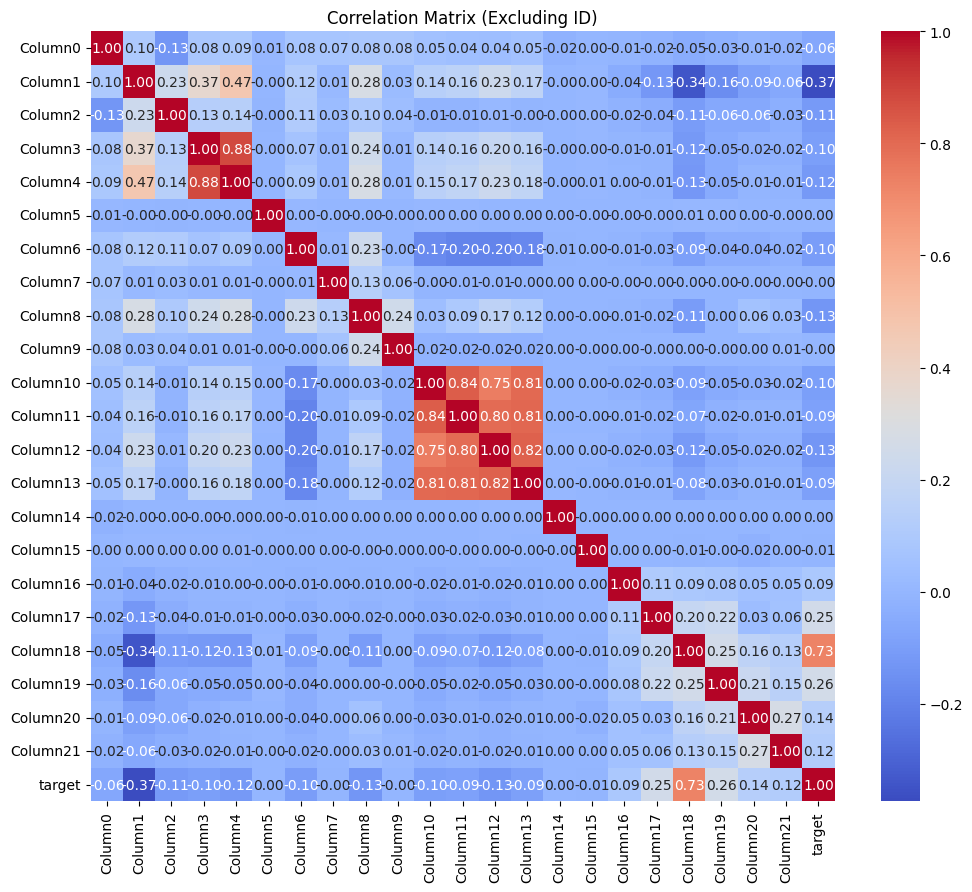

In [19]:
# Exclude the 'ID' column
correlation_matrix = df_train.drop('ID', axis=1).corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Excluding ID)')
plt.show()


In [57]:
df_train.dropna(subset=['Column0'], inplace=True)

In [23]:
columns_to_fill = ['Column5', 'Column6', 'Column9', 'Column14', 'Column15']

for column in columns_to_fill:
  median_val = df_train[column].median()
  df_train[column].fillna(median_val, inplace=True)

<ipython-input-23-8b72505d485c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[column].fillna(median_val, inplace=True)


In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select columns 3 and 4 for imputation
columns_to_impute = ['Column3', 'Column4']  # Replace 'col3' and 'col4' with the actual column names
df_impute = df_train[columns_to_impute].copy()

# Create an instance of IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the data
df_imputed = imputer.fit_transform(df_impute)

# Replace the original columns with the imputed values
df_train[columns_to_impute] = df_imputed

In [25]:
from sklearn.impute import KNNImputer

# Select column 8 for imputation
column_to_impute = ['Column8']

# Create a copy of the DataFrame for imputation
df_knn_impute = df_train[column_to_impute].copy()

# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
df_knn_imputed = imputer.fit_transform(df_knn_impute)

# Replace the original column with the imputed values
df_train[column_to_impute] = df_knn_imputed

In [26]:
df_train.isnull().sum()

,0
ID,0
Column0,0
Column1,0
Column2,0
Column3,0
Column4,0
Column5,0
Column6,0
Column7,0
Column8,0


In [27]:
unique_targets = df_train['target'].unique()
target_counts = df_train['target'].value_counts()

print("Unique Target Values and their Counts:")
for target in unique_targets:
  print(f"Target: {target}, Count: {target_counts[target]}")


Unique Target Values and their Counts:
Target: 0, Count: 711091
Target: 1, Count: 74033


In [30]:
df_Xtest = pd.read_csv("/content/drive/MyDrive/Dataset/GST/Test_20/Test_20/X_Test_Data_Input.csv")
df_Ytest = pd.read_csv("/content/drive/MyDrive/Dataset/GST/Test_20/Test_20/Y_Test_Data_Target.csv")

In [31]:
# Sort both DataFrames by 'ID' in ascending order
df_Xtest= df_Xtest.sort_values('ID')
df_Ytest= df_Ytest.sort_values('ID')

# Merge the DataFrames based on 'ID'
df_test = pd.merge(df_Xtest, df_Ytest, on='ID', how='left')

# Reset the index of the merged DataFrame
df_test.reset_index(drop=True, inplace=True)

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261712 entries, 0 to 261711
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        261712 non-null  object 
 1   Column0   261710 non-null  float64
 2   Column1   261712 non-null  int64  
 3   Column2   261712 non-null  float64
 4   Column3   219478 non-null  float64
 5   Column4   219002 non-null  float64
 6   Column5   206053 non-null  float64
 7   Column6   260478 non-null  float64
 8   Column7   261712 non-null  float64
 9   Column8   260478 non-null  float64
 10  Column9   17859 non-null   float64
 11  Column10  261712 non-null  int64  
 12  Column11  261712 non-null  int64  
 13  Column12  261712 non-null  int64  
 14  Column13  261712 non-null  int64  
 15  Column14  140033 non-null  float64
 16  Column15  256227 non-null  float64
 17  Column16  261712 non-null  float64
 18  Column17  261712 non-null  int64  
 19  Column18  261712 non-null  float64
 20  Colu

In [33]:
for column in df_test.columns:
  if df_test[column].isnull().any():
    print(f"Column: {column}")
    print(f"Number of unique entries: {df_test[column].nunique()}")
    print(f"Sum of null values: {df_test[column].isnull().sum()}")
    print("-" * 20)

Column: Column0
Number of unique entries: 19
Sum of null values: 2
--------------------
Column: Column3
Number of unique entries: 47
Sum of null values: 42234
--------------------
Column: Column4
Number of unique entries: 47
Sum of null values: 42710
--------------------
Column: Column5
Number of unique entries: 59586
Sum of null values: 55659
--------------------
Column: Column6
Number of unique entries: 60716
Sum of null values: 1234
--------------------
Column: Column8
Number of unique entries: 134980
Sum of null values: 1234
--------------------
Column: Column9
Number of unique entries: 16963
Sum of null values: 243853
--------------------
Column: Column14
Number of unique entries: 21948
Sum of null values: 121679
--------------------
Column: Column15
Number of unique entries: 24084
Sum of null values: 5485
--------------------


In [34]:
df_test.dropna(subset=['Column0'], inplace=True)

In [35]:
columns_to_fill = ['Column5', 'Column6', 'Column9', 'Column14', 'Column15']

for column in columns_to_fill:
  median_val = df_test[column].median()
  df_test[column].fillna(median_val, inplace=True)

<ipython-input-35-34cbbdf2e82c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[column].fillna(median_val, inplace=True)


In [36]:
# Select columns 3 and 4 for imputation
columns_to_impute = ['Column3', 'Column4']

# Create a copy of the DataFrame for imputation
df_impute_test = df_test[columns_to_impute].copy()

# Create an instance of IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer on the training data (df_train) and transform the test data (df_impute_test)
df_imputed_test = imputer.fit(df_train[columns_to_impute].copy()).transform(df_impute_test)

# Replace the original columns with the imputed values
df_test[columns_to_impute] = df_imputed_test

In [37]:
# Select column 8 for imputation
column_to_impute = ['Column8']

# Create a copy of the DataFrame for imputation
df_knn_impute_test = df_test[column_to_impute].copy()

# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the training data (df_train) and transform the test data (df_knn_impute_test)
df_knn_imputed_test = imputer.fit(df_train[column_to_impute].copy()).transform(df_knn_impute_test)

# Replace the original column with the imputed values
df_test[column_to_impute] = df_knn_imputed_test

In [38]:
df_test.isnull().sum()

,0
ID,0
Column0,0
Column1,0
Column2,0
Column3,0
Column4,0
Column5,0
Column6,0
Column7,0
Column8,0


In [39]:
unique_targets_test = df_test['target'].unique()
target_counts_test = df_test['target'].value_counts()

print("Unique Target Values and their Counts in df_test:")
for target in unique_targets_test:
  print(f"Target: {target}, Count: {target_counts_test[target]}")


Unique Target Values and their Counts in df_test:
Target: 1, Count: 24678
Target: 0, Count: 237032


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss, balanced_accuracy_score

In [41]:
# Step 1: Prepare the data
X_train = df_train.drop(['target', 'ID'], axis=1)
y_train = df_train['target']

X_test = df_test.drop(['target', 'ID'], axis=1)
y_test = df_test['target']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Step 3: Train KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' based on hyperparameter tuning
knn_model.fit(X_train_scaled, y_train)

# Step 4: Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)
y_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC score

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Log Loss: {logloss:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")


Accuracy: 0.9729
Precision: 0.8301
Recall: 0.8958
F1 Score: 0.8617
AUC-ROC: 0.9867
Confusion Matrix:
[[232506   4526]
 [  2572  22106]]
Log Loss: 0.2525
Balanced Accuracy: 0.9383


In [47]:
!pip install catboost
!pip install imbalanced-learn
from catboost import CatBoostClassifier

In [48]:
# Step 4: Train CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=10, eval_metric='F1', verbose=100)
catboost_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred1 = catboost_model.predict(X_test_scaled)
y_pred_proba1 = catboost_model.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC score

0:	learn: 0.8694710	total: 423ms	remaining: 7m 2s
100:	learn: 0.8965796	total: 34.8s	remaining: 5m 9s
200:	learn: 0.9029838	total: 1m 13s	remaining: 4m 53s
300:	learn: 0.9076638	total: 1m 51s	remaining: 4m 18s
400:	learn: 0.9121644	total: 2m 25s	remaining: 3m 37s
500:	learn: 0.9164179	total: 3m 2s	remaining: 3m 2s
600:	learn: 0.9193184	total: 3m 36s	remaining: 2m 23s
700:	learn: 0.9221107	total: 4m 12s	remaining: 1m 47s
800:	learn: 0.9247041	total: 4m 48s	remaining: 1m 11s
900:	learn: 0.9269718	total: 5m 25s	remaining: 35.7s
999:	learn: 0.9294252	total: 5m 59s	remaining: 0us


In [49]:
# Step 6: Calculate metrics
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
auc_roc = roc_auc_score(y_test, y_pred_proba1)
conf_matrix = confusion_matrix(y_test, y_pred1)
logloss = log_loss(y_test, y_pred_proba1)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred1)

# Step 7: Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Log Loss: {logloss:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

Accuracy: 0.9784
Precision: 0.8527
Recall: 0.9312
F1 Score: 0.8903
AUC-ROC: 0.9947
Confusion Matrix:
[[233063   3969]
 [  1697  22981]]
Log Loss: 0.0500
Balanced Accuracy: 0.9572
